<a href="https://colab.research.google.com/github/IgnacioVilar/Entrega-Analtica-Empresarial/blob/main/Trabajo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Caso de estudio
Una empresa que realiza ofertas de sus productos para los Black Friday, quiere proyectar cuales han sido los productos más vendidos en los Black Friday de los últimos 2 años y quiere proyectar sus ventas para el próximo. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import *

#data= 
datos = pd.read_csv('Analitica.csv', sep = ',')
#df=pd.read_csv('train (1).csv', sep=',')
datos.sort_values('Ship Date', inplace = True)
datosgenerales = datos.describe()
#datos.groupby(['Product ID']).count()
#datos['Product ID'].value_counts()
#cantidades = datos['Product ID'].str.contains('TEC-AC-10003832').count()

ventas = datos['Product Name']
freq = datos['Product Name'].value_counts() #dice la cantidad de cada producto que se vendieron
#freq no muestra todos los datos pq se ve que son muchos

tiposventas = datos['Category'].value_counts() #buscar cuantos de cada categoría se vendieron
valoresunicos = datos['Product Name'].unique() #muestra los productos que se vendieron por lo menos una vez (sin repetir)

pd.DataFrame(valoresunicos) #la forma de hacer que se vean todos los productos que se vendieron (sin repetir)
graficofreq = pd.DataFrame(freq) #aca se puede ver las frecuencias con las que se vendieron los productos. Podemos ver el que más se vendió
pd.DataFrame(tiposventas)
#grafico1 = graficofreq.plot(kind = 'bar') #no se ven nada los nombres de los productos, pero es un gráfico de barras
print(tiposventas)
datos


**EDA**

Falta hacer todo lo de ver que variables tengo y lo de los valores null. 

Puse muchos Print como comentarios para que quede el Dataframe limpio visible

Predict: {furprediction}
intercept (ordenada): {regresion.intercept_}
Coefficients: [288.5]
[[2014]
 [2015]
 [2016]
 [2017]]
[1564.  1852.5 2141.  2429.5]


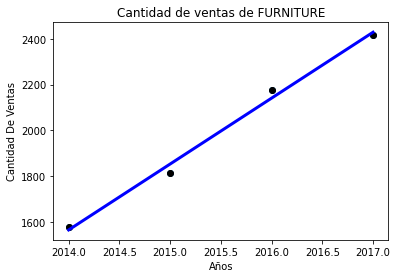

Coeficiente r: {r_sq}
Predict: {ofiprediction}
intercept (ordenada): {regresion.intercept_}
Coefficients: [1076.1]
[[2014]
 [2015]
 [2016]
 [2017]]
[4088.1 5164.2 6240.3 7316.4]


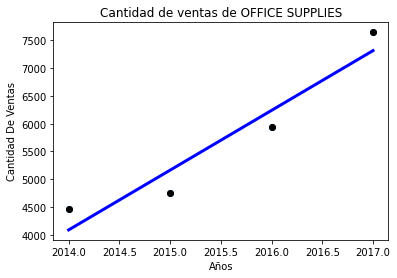

Coeficiente r: {r_sq}
Predict: {techprediction}
intercept (ordenada): {regresion.intercept_}
Coefficients: [324.8]
[[2014]
 [2015]
 [2016]
 [2017]]
[1244.3 1569.1 1893.9 2218.7]


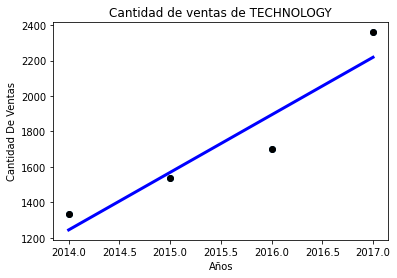

Coeficiente r: {r_sq}
Predict: {cvprediction}
intercept (ordenada): {regresion.intercept_}
Coefficients: [1689.4]
[[2014]
 [2015]
 [2016]
 [2017]]
[ 6896.4  8585.8 10275.2 11964.6]


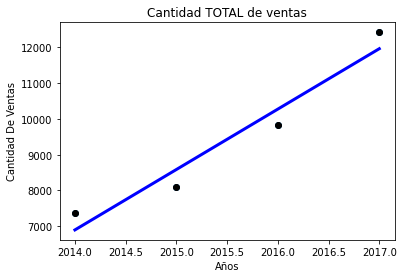

Coeficiente r: {0.9429501724590339}
 DATOS OBTENIDOS CON EL MODELO DE REGRESIÓN LINEAL 
La cantidad de ventas es:  [13654.] 
De Furniture son:  [2718.] 
De Office Supplies son:  [8392.5] 
De Technology son:  [2543.5] 


,Furniture,Office Supplies,Technology
2014,1577,4456,1332
2015,1815,4759,1535
2016,2177,5947,1699
2017,2418,7647,2360
2018,41,97,13


In [ ]:
import numpy as np
from numpy import*
import matplotlib.pyplot as plt
import pandas as pd
from pandas import*
from sklearn.linear_model import LinearRegression
#EDA
#Recopilación y Carga de Datos
datos = pd.read_csv('DatosAnalitica.csv', sep = ',') #importación de la base de datos
medidas=datos.shape #medidas de la base de datos
primerasfilas= datos.head(10) #para ver el modelo de la tabla con los primeros 10 valores
primerasfilas
# infogeneral=datos.info() 
columnas=datos.columns

#No hay datos nulos para limpiar
#Limpieza de Datos
datosgenerales = datos.describe()
datos.sort_values('Ship Date', inplace = True)
datos1= pd.DataFrame(datos)
datos1.sort_values('Category', inplace = True)
datos1
tiposventas = datos1['Category'].value_counts()
#print(tiposventas)
office=datos1.loc[[0,2100],'Category']
datos1
datosusar=datos1.iloc[:, [2,6,8,9]]
datos3=pd.DataFrame(datosusar)

#Dataframe de las ventas de 'Furniture'
datosA=datos3.iloc[0:2121]
furniture=pd.DataFrame(datosA)
furniture.sort_values('Ship Date', inplace = True)

#Dataframe de las ventas de 'Office Supplies'
datosB=datos3.iloc[2121:8147]
office=pd.DataFrame(datosB)
office.sort_values('Ship Date', inplace = True)

#Dataframe de las ventas de 'Office Supplies'
datosC=datos3.iloc[8147:9994]
technology=pd.DataFrame(datosC)
technology.sort_values('Ship Date', inplace = True)

#Furniture; Dataframes de las ventas de 'Furniture' separados en años
fechafur=furniture['Ship Date'].value_counts() 
#print(fechafur)
datosfechafur14=furniture.iloc[0:410]
fur14=pd.DataFrame(datosfechafur14)
datosfechafur15=furniture.iloc[410:871]
fur15=pd.DataFrame(datosfechafur15)
datosfechafur16=furniture.iloc[871:1428]
fur16=pd.DataFrame(datosfechafur16)
datosfechafur17=furniture.iloc[1428:2109]
fur17=pd.DataFrame(datosfechafur17)
datosfechafur18=furniture.iloc[2109:2121]
fur18=pd.DataFrame(datosfechafur18)
fur18
#Suma de las ventas de cada año
ventas14=fur14['Sales'].sum()
#print("Ventas Furniture 2014:",ventas14)
ventas15=fur15['Sales'].sum()
#print("Ventas Furniture 2015:",ventas15)
ventas16=fur16['Sales'].sum()
#print("Ventas Furniture 2016:",ventas16)
ventas17=fur17['Sales'].sum()
#print("Ventas Furniture 2017:",ventas17)
ventas18=fur18['Sales'].sum()
#print("Ventas Furniture 2018:",ventas18)
#Suma de las Cantidad de Ventas de cada año
cantventas14=fur14['Quantity'].sum()
#print("Cantidad de Ventas Furniture 2014:",ventas14)
cantventas15=fur15['Quantity'].sum()
#print("Cantidad de Ventas Furniture 2015:",ventas15)
cantventas16=fur16['Quantity'].sum()
#print("Cantidad de Ventas Furniture 2016:",ventas16)
cantventas17=fur17['Quantity'].sum()
#print("Cantidad de Ventas Furniture 2017:",ventas17)
cantventas18=fur18['Quantity'].sum()
#print("Cantidad de Ventas Furniture 2018:",ventas18)

#Office Supplies; Dataframes de las ventas de 'Office Supplies' separados en años
fechaoff=office['Ship Date'].value_counts() 
#print(fechaoff)
datosfechaoff14=office.iloc[0:1190]
off14=pd.DataFrame(datosfechaoff14)
datosfechaoff15=office.iloc[1190:2439]
off15=pd.DataFrame(datosfechaoff15)
datosfechaoff16=office.iloc[2439:4002]
off16=pd.DataFrame(datosfechaoff16)
datosfechaoff17=office.iloc[4002:5999]
off17=pd.DataFrame(datosfechaoff17)
datosfechaoff18=office.iloc[5999:6026]
off18=pd.DataFrame(datosfechaoff18)
#Suma de las ventas de cada año
ventasof14=off14['Sales'].sum()
#print("Ventas Office 2014:",ventasof14)
ventasof15=off15['Sales'].sum()
#print("Ventas Office 2015:",ventasof15)
ventasof16=off16['Sales'].sum()
#print("Ventas Office 2016:",ventasof16)
ventasof17=off17['Sales'].sum()
#print("Ventas Office 2017:",ventasof17)
ventasof18=off18['Sales'].sum()
#print("Ventas Office 2018:",ventasof18)
#Suma de la Cantidad de ventas de cada año
cantventasof14=off14['Quantity'].sum()
#print("Cantidad de Ventas Office 2014:",ventasof14)
cantventasof15=off15['Quantity'].sum()
#print("Cantidad de Ventas Office 2015:",ventasof15)
cantventasof16=off16['Quantity'].sum()
#print("Cantidad de Ventas Office 2016:",ventasof16)
cantventasof17=off17['Quantity'].sum()
#print("Cantidad de Ventas Office 2017:",ventasof17)
cantventasof18=off18['Quantity'].sum()
#print("Cantidad de Ventas Office 2018:",ventasof18)

#Technology; Dataframes de las ventas de 'Technology' separados en años
fechatech=technology['Ship Date'].value_counts() 
#print(fechatech)
datosfechatech14=technology.iloc[0:340]
tech14=pd.DataFrame(datosfechatech14)
datosfechatech15=technology.iloc[340:761]
tech15=pd.DataFrame(datosfechatech15)
datosfechatech16=technology.iloc[761:1219]
tech16=pd.DataFrame(datosfechatech16)
datosfechatech17=technology.iloc[1219:1844]
tech17=pd.DataFrame(datosfechatech17)
datosfechatech18=technology.iloc[1844:1847]
tech18=pd.DataFrame(datosfechatech18)
#Suma de las ventas de cada año
ventastech14=tech14['Sales'].sum()
#print("Ventas Technology 2014:",ventastech14)
ventastech15=tech15['Sales'].sum()
##print("Ventas Technology 2015:",ventastech15)
ventastech16=tech16['Sales'].sum()
#print("Ventas Technology 2016:",ventastech16)
ventastech17=tech17['Sales'].sum()
#print("Ventas Technology 2017:",ventastech17)
ventastech18=tech18['Sales'].sum()
#print("Ventas Technology 2018:",ventastech18)
#Suma de las Cantidad de ventas de cada año
cantventastech14=tech14['Quantity'].sum()
#print("Cantidad de Ventas Technology 2014:",ventastech14)
cantventastech15=tech15['Quantity'].sum()
#print("Cantidad de Ventas Technology 2015:",ventastech15)
cantventastech16=tech16['Quantity'].sum()
#print("Cantidad de Ventas Technology 2016:",ventastech16)
cantventastech17=tech17['Quantity'].sum()
#print("Cantidad de Ventas Technology 2017:",ventastech17)
cantventastech18=tech18['Quantity'].sum()
#print("Cantidad de Ventas Technology 2018:",ventastech18)

#Creación del DataFrame para la regresión lineal con ventas
año14=[ventas14, ventasof14, ventastech14]
año15=[ventas15, ventasof15, ventastech15]
año16=[ventas16, ventasof16, ventastech16]
año17=[ventas17, ventasof17, ventastech17]
año18=[ventas18, ventasof18, ventastech18]
finalventas=pd.DataFrame(index = ['Furniture', 'Office Supplies', 'Technology'])
finalventas['2014'] = año14
finalventas['2015'] = año15
finalventas['2016'] = año16
finalventas['2017'] = año17
finalventas['2018'] = año18
finalventas

#Creación del DataFrame para la regresión lineal con Cantidad de ventas
#Suma de las ventas totales de cada año
suma14=cantventas14+cantventasof14+cantventastech14
suma15=cantventas15+cantventasof15+cantventastech15
suma16=cantventas16+cantventasof16+cantventastech16
suma17=cantventas17+cantventasof17+cantventastech17
suma18=cantventas18+cantventasof18+cantventastech18

furcv=[cantventas14, cantventas15, cantventas16, cantventas17, cantventas18]
officecv=[cantventasof14, cantventasof15, cantventasof16, cantventasof17, cantventasof18]
techcv=[cantventastech14, cantventastech15, cantventastech16, cantventastech17, cantventastech18]
totalcv=[suma14, suma15, suma16, suma17, suma18]
furnituretxt='Furniture'
officetxt='Office Supplies'
techtxt='Technology'
totaltxt='Total'
finalcv=pd.DataFrame(index = ['2014', '2015', '2016', '2017','2018'])
#años= np.array([2014,2015,2016,2017,2018])
#ventas=([año14cv, año15cv, año16cv, año17cv, año18cv])
#finalcv.iloc[0] = año14cv
finalcv[furnituretxt] = furcv
finalcv[officetxt] = officecv
finalcv[techtxt] = techcv


finalcv
#Regresión Lineal de la cantidad de ventas de 'Furniture'
x_años = np.array([2014,2015,2016,2017]).reshape((-1, 1))
y_fur = np.array([cantventas14, cantventas15, cantventas16, cantventas17])
import matplotlib.pyplot as plt
plt.scatter(x_años,y_fur)

regresion = LinearRegression()
#model.fit(x, y)
regresion.fit(x_años, y_fur)

#Predecir Datos
furprediction= regresion.predict([[2018]])
print("Predict: {furprediction}")
print("intercept (ordenada): {regresion.intercept_}")
print("Coefficients:", regresion.coef_)

# Nos da el gráfico con la Línea de Regresión Lineal
predicv = regresion.predict(x_años)
print(x_años)
print(predicv)
plt.scatter(x_años,y_fur, color="black")
plt.plot(x_años,predicv, color="blue", linewidth=3)
plt.title("Cantidad de ventas de FURNITURE")
plt.xlabel('Años')
plt.ylabel('Cantidad De Ventas')
plt.show()

#Cálculo del coeficiente r
r_sq = regresion.score(x_años,y_fur)
print("Coeficiente r: {r_sq}")

#Regresión Lineal de la cantidad de ventas de 'Office Supplies'
x_años = np.array([2014,2015,2016,2017]).reshape((-1, 1))
y_ofi = np.array([cantventasof14, cantventasof15, cantventasof16, cantventasof17])
import matplotlib.pyplot as plt
plt.scatter(x_años,y_ofi)

regresion = LinearRegression()
#model.fit(x, y)
regresion.fit(x_años, y_ofi)

#Predecir los datos
ofiprediction= regresion.predict([[2018]])
print("Predict: {ofiprediction}")
print("intercept (ordenada): {regresion.intercept_}")
print("Coefficients:", regresion.coef_)

# Nos da el gráfico con la Línea de Regresión Lineal
predicv = regresion.predict(x_años)
print(x_años)
print(predicv)
plt.scatter(x_años,y_ofi, color="black")
plt.plot(x_años,predicv, color="blue", linewidth=3)
plt.title("Cantidad de ventas de OFFICE SUPPLIES")
plt.xlabel('Años')
plt.ylabel('Cantidad De Ventas')
plt.show()

#Cálculo del coeficiente r
r_sq = regresion.score(x_años,y_ofi)
print("Coeficiente r: {r_sq}")

#Regresión Lineal de la cantidad de ventas de 'Technology'
x_años = np.array([2014,2015,2016,2017]).reshape((-1, 1))
y_tech = np.array([cantventastech14, cantventastech15, cantventastech16, cantventastech17])
import matplotlib.pyplot as plt
plt.scatter(x_años,y_tech)

regresion = LinearRegression()
#model.fit(x, y)
regresion.fit(x_años, y_tech)

#no se para que es esto la verdad
techprediction= regresion.predict([[2018]])
print("Predict: {techprediction}")
print("intercept (ordenada): {regresion.intercept_}")
print("Coefficients:", regresion.coef_)

# Nos da el gráfico con la Línea de Regresión Lineal
predicv = regresion.predict(x_años)
print(x_años)
print(predicv)
plt.scatter(x_años,y_tech, color="black")
plt.plot(x_años,predicv, color="blue", linewidth=3)
plt.title("Cantidad de ventas de TECHNOLOGY")
plt.xlabel('Años')
plt.ylabel('Cantidad De Ventas')
plt.show()

#Cálculo del coeficiente r
r_sq = regresion.score(x_años,y_tech)
print("Coeficiente r: {r_sq}")

#Regresión Lineal de la cantidad total de ventas
x_años = np.array([2014,2015,2016,2017]).reshape((-1, 1))
y_cv = np.array([suma14, suma15, suma16, suma17])
import matplotlib.pyplot as plt
plt.scatter(x_años,y_cv)

regresion = LinearRegression()
#model.fit(x, y)
regresion.fit(x_años, y_cv)

#no se para que es esto la verdad
cvprediction= regresion.predict([[2018]])
print("Predict: {cvprediction}")
print("intercept (ordenada): {regresion.intercept_}")
print("Coefficients:", regresion.coef_)

# Nos da el gráfico con la Línea de Regresión Lineal
predicv = regresion.predict(x_años)
print(x_años)
print(predicv)
plt.scatter(x_años,y_cv, color="black")
plt.plot(x_años,predicv, color="blue", linewidth=3)
plt.title("Cantidad TOTAL de ventas")
plt.xlabel('Años')
plt.ylabel('Cantidad De Ventas')
plt.show()

#Cálculo del coeficiente r
r_sq = regresion.score(x_años,y_cv)
print("Coeficiente r:",{r_sq})

print('\033[1m','DATOS OBTENIDOS CON EL MODELO DE REGRESIÓN LINEAL','\033[0m' )
print('La cantidad de ventas es:','\033[1m',cvprediction,'\033[0m')
print('De Furniture son:','\033[1m',furprediction,'\033[0m')
print('De Office Supplies son:','\033[1m',ofiprediction,'\033[0m')
print('De Technology son:','\033[1m',techprediction,'\033[0m')
#Con estas cuatro regresiones podemos ver el estimado de ventas para el 2018 y cualquier año futuro. 
#Podemos ver que cantidad de ventas pertenecen a cada categoría viendo la cant ventas de cada una por separado.
finalcv


In [ ]:
#INICIALIZACIÓN
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#saqué una parte que decía que era para guardarlo)?
#Descargar los datos
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Definimos un método para descargar los datos 
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

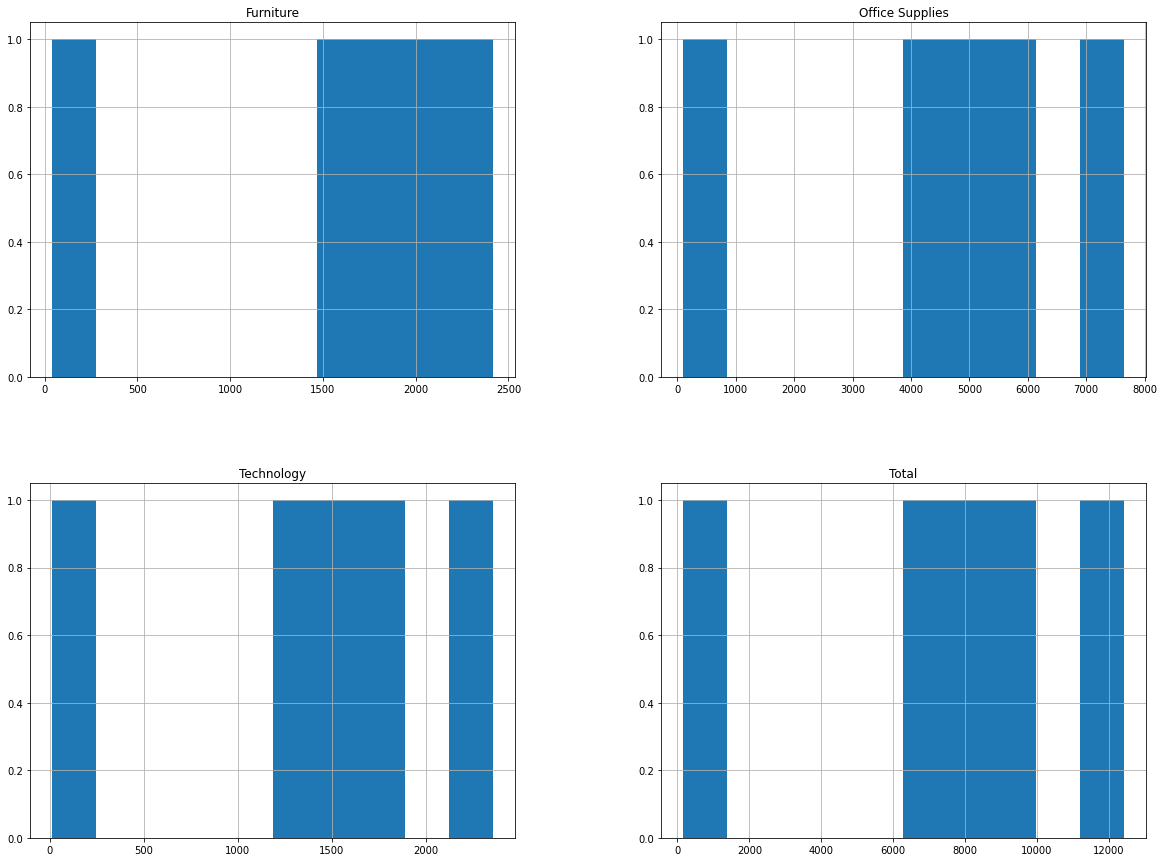

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
finalcv.hist(bins=10, figsize=(20,15))
plt.show()

In [ ]:
import numpy as np

# Sklearn ya tiene un método train_test_split() que puede usarse directamente. 
def split_train_test(, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
corr_matrix = datos.corr()
corr_matrix
corr_matrix["Quantity"].sort_values(ascending=False)

Quantity     1.000000
Sales        0.200795
Profit       0.066253
Discount     0.008623
Row ID      -0.004016
Ship Date   -0.006716
Name: Quantity, dtype: float64

# Sección nueva